In [5]:
import pandas as pd
import datetime as dt
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests 
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [31]:
# coleta os feriados nacionais de 2001 a 2078 de um excel:
feriados = str(r'C:\Users\patri\OneDrive - Insper - Institudo de Ensino e Pesquisa\INSPER\INSPER\AULA FINANÇAS\FIN III\feriados_nacionais.xlsx')
df_feriado = pd.read_excel(feriados)

#transforma os dados da coluna 'Data', que não forem datas, em NAN. Em seguida, delete linhas que tem datas NAN:
for i in range(len(df_feriado)):
    if str(type(df_feriado.loc[i,"Data"])) != "<class 'datetime.datetime'>":
        df_feriado.loc[i,"Data"] = np.nan
df_feriado=df_feriado.dropna(subset=["Data"])

#obtém os feriados existentes e armazena para cada feriado as datas em que ocorrem:
dias_feriados = df_feriado['Data'].tolist()
for i in range(len(dias_feriados)):
    dias_feriados[i] = dias_feriados[i].date()

#print(df_feriado)
#print(dias_feriados)

                    Data  Dia da Semana  \
0    2001-01-01 00:00:00  segunda-feira   
1    2001-02-26 00:00:00  segunda-feira   
2    2001-02-27 00:00:00    terça-feira   
3    2001-04-13 00:00:00    sexta-feira   
4    2001-04-21 00:00:00         sábado   
..                   ...            ...   
931  2078-09-07 00:00:00   quarta-feira   
932  2078-10-12 00:00:00   quarta-feira   
933  2078-11-02 00:00:00   quarta-feira   
934  2078-11-15 00:00:00    terça-feira   
935  2078-12-25 00:00:00   quarta-feira   

                                        Feriado  
0                    Confraternização Universal  
1                                      Carnaval  
2                                      Carnaval  
3                              Paixão de Cristo  
4                                    Tiradentes  
..                                          ...  
931                     Independência do Brasil  
932  Nossa Sr.a Aparecida - Padroeira do Brasil  
933                              

In [49]:
#inibe o warning por abrir https da B3 com certificado vencido:
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

# define um dicionário com meses da B3 equivalente com as letras dos vencimentos de contratos:
mesesB3 = {"F": 1,
           "G" :2,
           "H" :3,
           "J" : 4,
           "K" : 5,
           "M" : 6,
           "N" : 7,
           "Q" : 8,
           "U" :9,
           "V" : 10,
           "X" : 11,
           "Z" :12}

#importacao de vencimentos DI da B3 da aba:https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/derivativos/ajustes-do-pregao/
htmlB3 = "https://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-ajustes-do-pregao-ptBR.asp"

# pega a data de hoje da tabela
html_text = requests.get(htmlB3,verify=False).text  #verify verifica o certificado Transport Layer Security (TLS) do site
dthoje=html_text[html_text.find("frmBD);")+16:html_text.find("frmBD);")+26]
dthoje=dt.date(day=int(dthoje[0:2]),month=int(dthoje[3:5]),year=int(dthoje[6:]))

# leia a tabela dos ajustes diarios
df1=pd.read_html(htmlB3,thousands=".",decimal=",")

# df1 eh uma lista de dataframes e me interessa o df 0
df1 = df1[0]

# acerta nomes das mercadorias em linhas com nan 

mant = df1.loc[0,"Mercadoria"] 

for i in range(len(df1)):
    if pd.isna(df1.loc[i,"Mercadoria"]):
        df1.loc[i,"Mercadoria"]=mant
    else: mant = df1.loc[i,"Mercadoria"] 
  
  # cria dfdi somente com di e reindexa 
dfdi = pd.DataFrame(df1[df1["Mercadoria"]=="DI1 - DI de 1 dia"]) 
dfdi.reset_index(inplace=True, drop=True)
dfdi

,Mercadoria,Vencimento,Preço de ajuste anterior,Preço de ajuste Atual,Variação,Valor do ajuste por contrato (R$)
0,DI1 - DI de 1 dia,M22,99905.46,99905.54,0.08,0.08
1,DI1 - DI de 1 dia,N22,98900.17,98899.83,-0.34,0.34
2,DI1 - DI de 1 dia,Q22,97884.34,97883.81,-0.53,0.53
3,DI1 - DI de 1 dia,U22,96768.10,96765.24,-2.86,2.86
4,DI1 - DI de 1 dia,V22,95754.89,95747.96,-6.93,6.93
5,DI1 - DI de 1 dia,X22,94796.02,94785.56,-10.46,10.46
6,DI1 - DI de 1 dia,Z22,93848.86,93827.06,-21.80,21.80
7,DI1 - DI de 1 dia,F23,92819.98,92783.22,-36.76,36.76
8,DI1 - DI de 1 dia,G23,91787.03,91740.77,-46.26,46.26
9,DI1 - DI de 1 dia,H23,90973.84,90918.09,-55.75,55.75


In [37]:
# cria data de exercicio e ajusta para o primeiro dia util de cada mês:
for i in range(len(dfdi)):
    ano = int(dfdi.loc[i,"Vencimento"][1:3]) + 2000
    dia = 1
    mes = mesesB3[dfdi.loc[i,"Vencimento"][0]]
    dfdi.loc[i,"Exercicio"] = np.busday_offset(dt.date(ano,mes,dia),0, holidays = dias_feriados, roll = "forward").astype(dt.datetime)

In [41]:
#calcula o número de dias úteis de hoje até o exercício:
dfdi['DU'] = dfdi.apply(lambda row : np.busday_count(dthoje, row["Exercicio"], holidays = dias_feriados),axis=1)
dfdi

,Mercadoria,Vencimento,Preço de ajuste anterior,Preço de ajuste Atual,Variação,Valor do ajuste por contrato (R$),Exercicio,DU
0,DI1 - DI de 1 dia,M22,99905.46,99905.54,0.08,0.08,2022-06-01,2
1,DI1 - DI de 1 dia,N22,98900.17,98899.83,-0.34,0.34,2022-07-01,23
2,DI1 - DI de 1 dia,Q22,97884.34,97883.81,-0.53,0.53,2022-08-01,44
3,DI1 - DI de 1 dia,U22,96768.10,96765.24,-2.86,2.86,2022-09-01,67
4,DI1 - DI de 1 dia,V22,95754.89,95747.96,-6.93,6.93,2022-10-03,88
5,DI1 - DI de 1 dia,X22,94796.02,94785.56,-10.46,10.46,2022-11-01,108
6,DI1 - DI de 1 dia,Z22,93848.86,93827.06,-21.80,21.80,2022-12-01,128
7,DI1 - DI de 1 dia,F23,92819.98,92783.22,-36.76,36.76,2023-01-02,150
8,DI1 - DI de 1 dia,G23,91787.03,91740.77,-46.26,46.26,2023-02-01,172
9,DI1 - DI de 1 dia,H23,90973.84,90918.09,-55.75,55.75,2023-03-01,190


In [46]:
#calcular a taxa spot através do PU
dfdi['SpotRate'] = dfdi.apply(lambda row : ((100000/row["Preço de ajuste Atual"])**(252/row["DU"]))-1,axis = 1)

,Mercadoria,Vencimento,Preço de ajuste anterior,Preço de ajuste Atual,Variação,Valor do ajuste por contrato (R$),Exercicio,DU,SpotRate
0,DI1 - DI de 1 dia,M22,99905.46,99905.54,0.08,0.08,2022-06-01,2,0.126455
1,DI1 - DI de 1 dia,N22,98900.17,98899.83,-0.34,0.34,2022-07-01,23,0.128860
2,DI1 - DI de 1 dia,Q22,97884.34,97883.81,-0.53,0.53,2022-08-01,44,0.130320
3,DI1 - DI de 1 dia,U22,96768.10,96765.24,-2.86,2.86,2022-09-01,67,0.131650
4,DI1 - DI de 1 dia,V22,95754.89,95747.96,-6.93,6.93,2022-10-03,88,0.132500
5,DI1 - DI de 1 dia,X22,94796.02,94785.56,-10.46,10.46,2022-11-01,108,0.133100
6,DI1 - DI de 1 dia,Z22,93848.86,93827.06,-21.80,21.80,2022-12-01,128,0.133650
7,DI1 - DI de 1 dia,F23,92819.98,92783.22,-36.76,36.76,2023-01-02,150,0.134100
8,DI1 - DI de 1 dia,G23,91787.03,91740.77,-46.26,46.26,2023-02-01,172,0.134620
9,DI1 - DI de 1 dia,H23,90973.84,90918.09,-55.75,55.75,2023-03-01,190,0.134600


In [51]:
dthoje

datetime.date(2022, 5, 30)

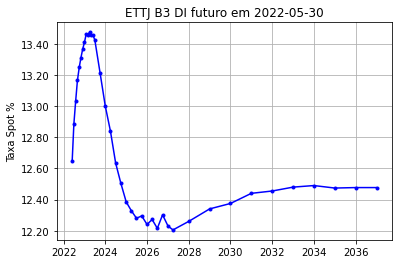

In [48]:
#gráfico ETTJ
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(dfdi["Exercicio"],dfdi["SpotRate"]*100, "b-",marker = ".")
ax.grid()
ax.set_title("ETTJ B3 DI futuro em "+str(dthoje))
ax.set_ylabel("Taxa Spot %")
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%5.2f'))
plt.show()